### This analysis is a practice of what I learnt from the university of quant data science online course using the datasets of house price in Miami. 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
#itcontains information about miami housing datasets
df = pd.read_csv("Miami-housing.csv")

In [73]:
df.shape

(13932, 11)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SALE_PRC       13932 non-null  int64  
 1   LND_SQFOOT     13932 non-null  int64  
 2   TOT_LVG_AREA   13932 non-null  int64  
 3   SPEC_FEAT_VAL  13932 non-null  int64  
 4   RAIL_DIST      13932 non-null  float64
 5   OCEAN_DIST     13932 non-null  float64
 6   WATER_DIST     13932 non-null  float64
 7   CNTR_DIST      13932 non-null  float64
 8   SUBCNTR_DI     13932 non-null  float64
 9   HWY_DIST       13932 non-null  float64
 10  age            13932 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.2 MB


In [75]:
df.describe()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age
count,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251
std,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068
min,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000
25%,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000
50%,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000
75%,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000
max,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000


In [79]:
df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age
0,440000,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67
1,349000,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63
2,800000,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61
3,988000,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63
4,755000,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42


In [77]:
df.columns

Index(['SALE_PRC', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age'],
      dtype='object')

### Explorative Data Analysis

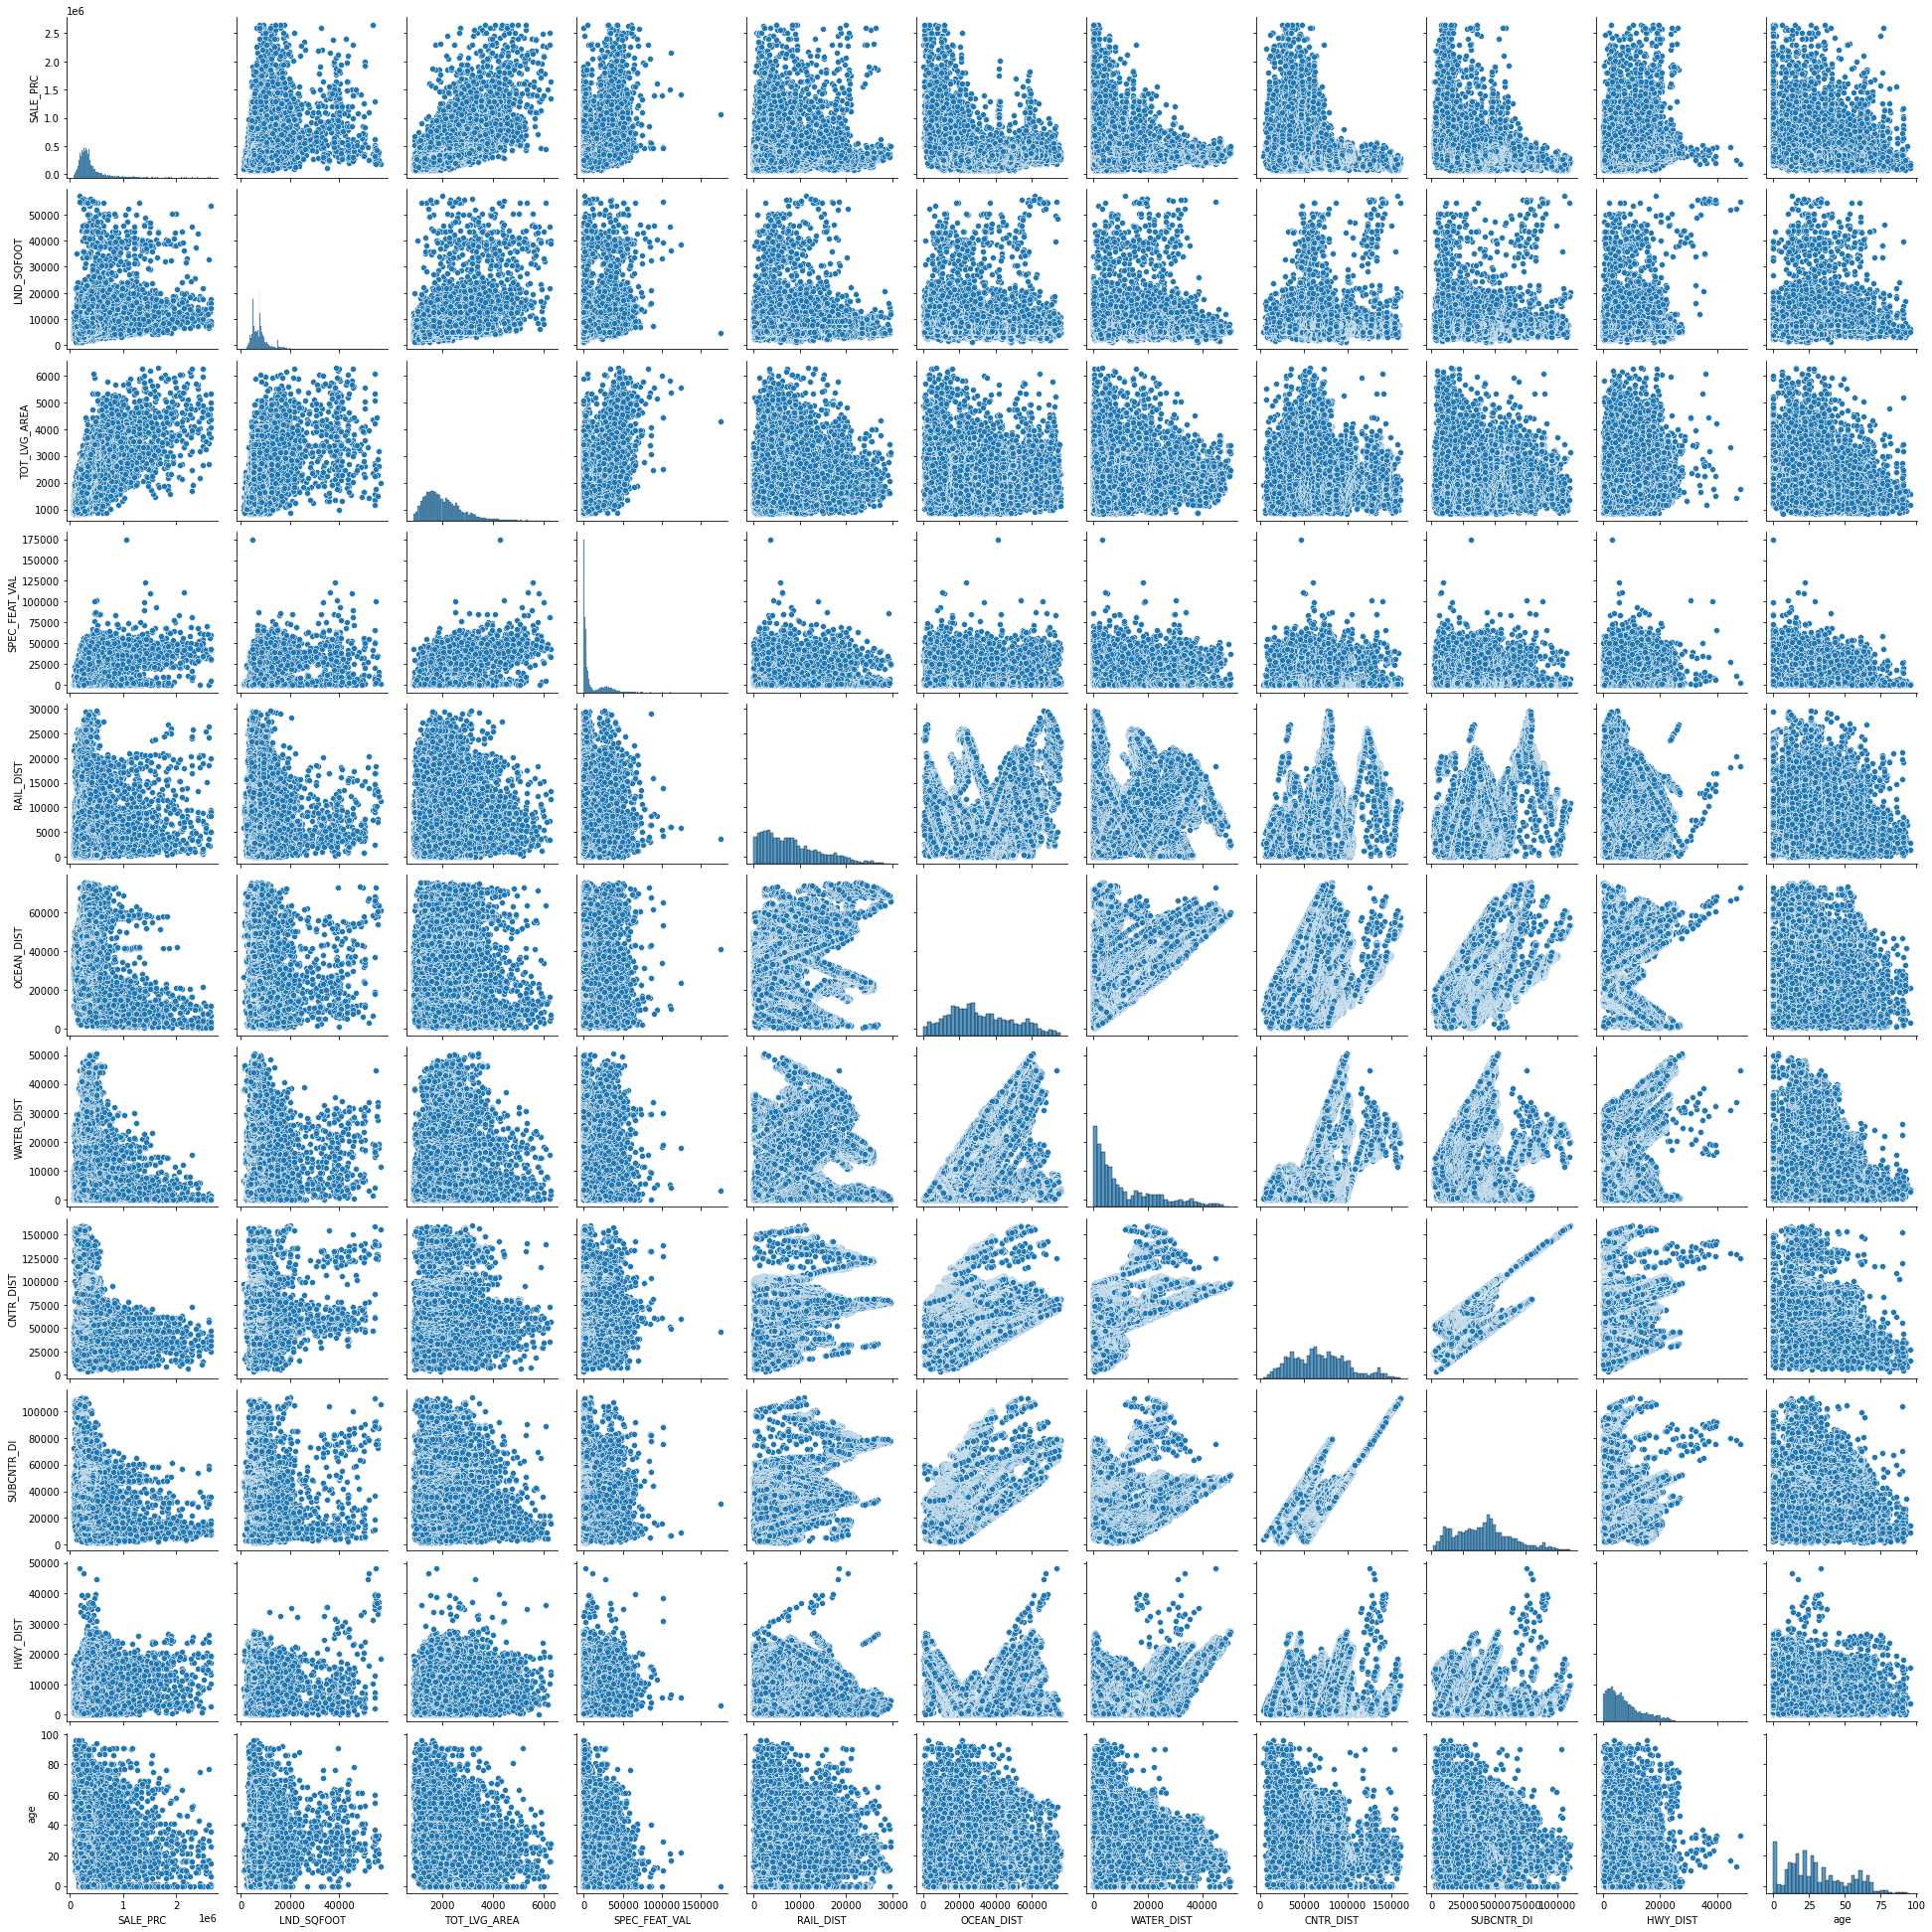

In [78]:
sns.pairplot(df)

/home/omoajadi/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE_PRC', ylabel='Density'>

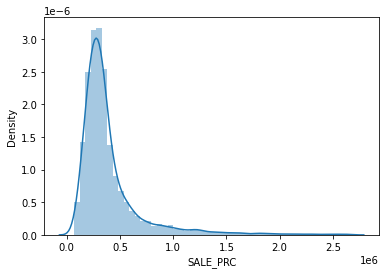

In [80]:
sns.distplot(df["SALE_PRC"])

Text(0, 0.5, 'Percentile')

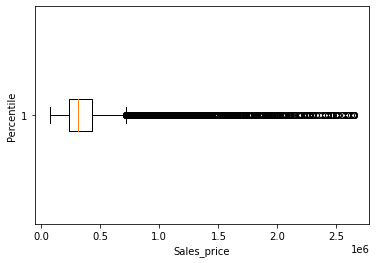

In [85]:
plt.boxplot(df["SALE_PRC"], vert = False)
plt.xlabel("Sales_price")
plt.ylabel("Percentile")

<AxesSubplot:>

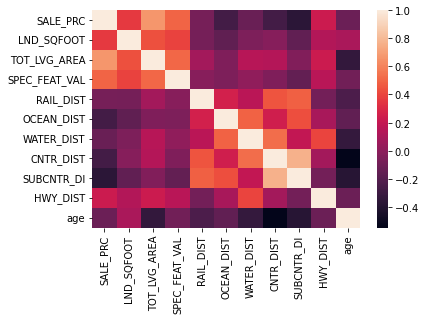

In [86]:
sns.heatmap(df.corr())

### Training a Linear Regression Model

In [87]:
df.columns

Index(['SALE_PRC', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age'],
      dtype='object')

In [91]:
X = df[["LND_SQFOOT", "TOT_LVG_AREA", "SPEC_FEAT_VAL", "RAIL_DIST",
       "OCEAN_DIST", "WATER_DIST", "CNTR_DIST", "SUBCNTR_DI", "HWY_DIST",
       "age"]] #Feature Matrix
y = df["SALE_PRC"] #Target Vector

### Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [96]:
y_mean = y.mean()

In [101]:
y_pred_baseline = [y_mean] * len(y_train)


In [106]:
#assertain
assert(len(y_pred_baseline) == len(y_train))

In [107]:
from sklearn import metrics

In [111]:
mae_baseline = metrics.mean_absolute_error(y_train, y_pred_baseline)

print(f"mean actual price: ${round(y_mean, 2)}")
print(f"Baseline MAE: ${round(mae_baseline, 2)}")

mean actual price: $399941.93
Baseline MAE: $196936.42


#### The interpretation of the results shows that, if we always predicted an apartment price is 399941.93 (dollars) our predictions would be off by an average of 196936.42 (dollars). it also tells us that our model needs to have mean absolute error below 196936.42 (dollars) in order to be useful

## ITERATION

In [112]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()

In [115]:
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [118]:
print(f"Intercept: ${model.intercept_}")

Intercept: $308817.997600791


In [119]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns =["coefficient"])
coeff_df

,coefficient
LND_SQFOOT,1.816854
TOT_LVG_AREA,203.225604
SPEC_FEAT_VAL,3.436702
RAIL_DIST,6.170346
OCEAN_DIST,-3.184173
WATER_DIST,-0.898097
CNTR_DIST,-3.907632
SUBCNTR_DI,-0.616830
HWY_DIST,7.250516
age,-2510.404171


### Interpreting the coefficient 

Holding all other features fixed, a 1 unit increase in Avg. LND_SQFOOT is associated with an *increase of $1.816854 


In [120]:
pred = model.predict(X_test)

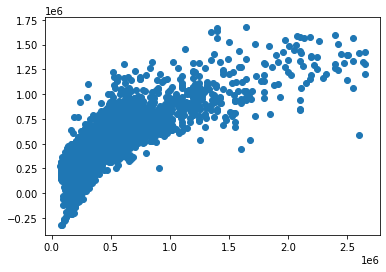

In [121]:
plt.scatter(y_test, pred)

In [124]:
mae_output = metrics.mean_absolute_error(y_test, pred)
print(f"MAE_MODEL:${round(mae_output, 2)}")

MAE_MODEL:$119600.02


### Interpretation of the result: Our model beat the baseline by over $77000

/home/omoajadi/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


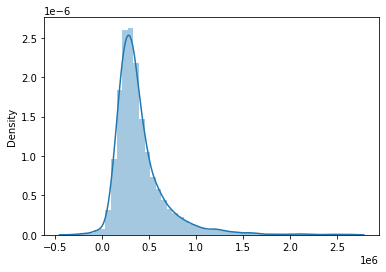

In [127]:
sns.distplot((y_test, pred), bins = 50);

In [130]:
#checking for the mean square error to compare with the mean absolute error
MSE = round(metrics.mean_squared_error(y_test, pred), 2)
print(f"mean square erro: ${MSE}")

mean square erro: $33742890779.92


In [140]:
#checking for the root mean square error

RMSE = np.sqrt(round(metrics.mean_squared_error(y_test, pred), 2))
print(F"RMSE: ${RMSE}")

RMSE: $183692.38084340896


### Communicate Result

using the equation of straight line: Y = mX + C

In [144]:
Intercept = model.intercept_
print(f"The bias along the Y-axis: ${round(Intercept, 2)}")

The bias along the Y-axis: $308818.0
